<a href="https://colab.research.google.com/github/thinhtran30/Terrorism/blob/master/Motive_and_Target_Team_5_Global_Terrorism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Team 5 - Global Terrorism

![](https://static.euronews.com/articles/stories/04/44/85/80/1440x810_cmsv2_42163f70-0149-51fc-91a2-6608636a809b-4448580.jpg)

_For more information about the dataset, read [here](https://www.kaggle.com/START-UMD/gtd)._

## Your tasks
- Name your team!
- Read the source and do some quick research to understand more about the dataset and its topic
- Clean the data
- Perform Exploratory Data Analysis on the dataset
- Analyze the data more deeply and extract insights

## Submission Guide
- Create a Github repository for your project
- Upload the dataset (.csv file) and the Jupyter Notebook to your Github repository.
- Submit your works through Google Form (Link on Learning Portal)

## Tips for Data Cleaning, Manipulation & Visualization
- Here are some of our tips for Data Cleaning, Manipulation & Visualization. [Click here](https://hackmd.io/cBNV7E6TT2WMliQC-GTw1A)

# I. Prepare data base:

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

mpl.style.use('seaborn-whitegrid')
sns.set_style("whitegrid")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# Get data base:
db = pd.read_csv('/content/drive/My Drive/FTMLE - Philippines/Week 3/assignments/datasets/05-global-terrorism/terrorism.csv', encoding='ISO-8859-1')

In [0]:
# Global Data
# target or victim: type of victim, more information about the victim, name of corporate was target, most specific data about victim, victim nationality, second target 
glob = db[['eventid','iday','imonth','iyear','country_txt', 'region_txt', 'provstate', 'targtype1_txt', 'targsubtype1_txt','corp1', 'target1', 'natlty1_txt', 'targtype2_txt', 'crit1', 'crit2', 'crit3', 'doubtterr']]

In [0]:
# Get data of USA
USA = glob[glob['country_txt'] == 'United States']
USA

,eventid,iday,imonth,iyear,country_txt,region_txt,provstate,targtype1_txt,targsubtype1_txt,corp1,target1,natlty1_txt,targtype2_txt,crit1,crit2,crit3,doubtterr
5,197001010002,1,1,1970,United States,North America,Illinois,Police,"Police Building (headquarters, station, school)",Cairo Police Department,Cairo Police Headquarters,United States,NaN,1,1,1,0.0
7,197001020002,2,1,1970,United States,North America,California,Utilities,Electricity,Pacific Gas & Electric Company,Edes Substation,United States,NaN,1,1,1,1.0
8,197001020003,2,1,1970,United States,North America,Wisconsin,Military,Military Recruiting Station/Academy,R.O.T.C.,"R.O.T.C. offices at University of Wisconsin, M...",United States,NaN,1,1,1,0.0
9,197001030001,3,1,1970,United States,North America,Wisconsin,Government (General),Government Building/Facility/Office,Selective Service,Selective Service Headquarters in Madison Wisc...,United States,NaN,1,1,1,0.0
10,197001050001,1,1,1970,United States,North America,Wisconsin,Military,Military Barracks/Base/Headquarters/Checkpost,NaN,Badger Army ammo depot.,United States,NaN,1,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180461,201711130042,13,11,2017,United States,North America,North Carolina,Religious Figures/Institutions,Place of Worship,Providence Road Baptist Church,Church,United States,NaN,1,1,1,0.0
181141,201712070037,7,12,2017,United States,North America,New Mexico,Educational Institution,School/University/Educational Building,Aztec High School,School,United States,NaN,1,1,1,0.0
181219,201712110001,11,12,2017,United States,North America,New York,Transportation,Bus Station/Stop,Port Authority of New York and New Jersey,Bus Terminal,United States,NaN,1,1,1,0.0
181478,201712220022,22,12,2017,United States,North America,Pennsylvania,Police,Police Patrol (including vehicles and convoys),Pennsylvania State Capitol Police,Vehicle,United States,NaN,0,1,1,1.0


# II. Explore data:
## A. The most target:

In [0]:
# 1. Creat dictionary for frequency of target cartegories:
a = list(USA['targtype1_txt'])
d = {}
for i in a:
  if i in d:
    d.update({i: d.get(i)+1})
  else:
    d[i] = 1


<BarContainer object of 22 artists>

<Figure size 432x288 with 0 Axes>

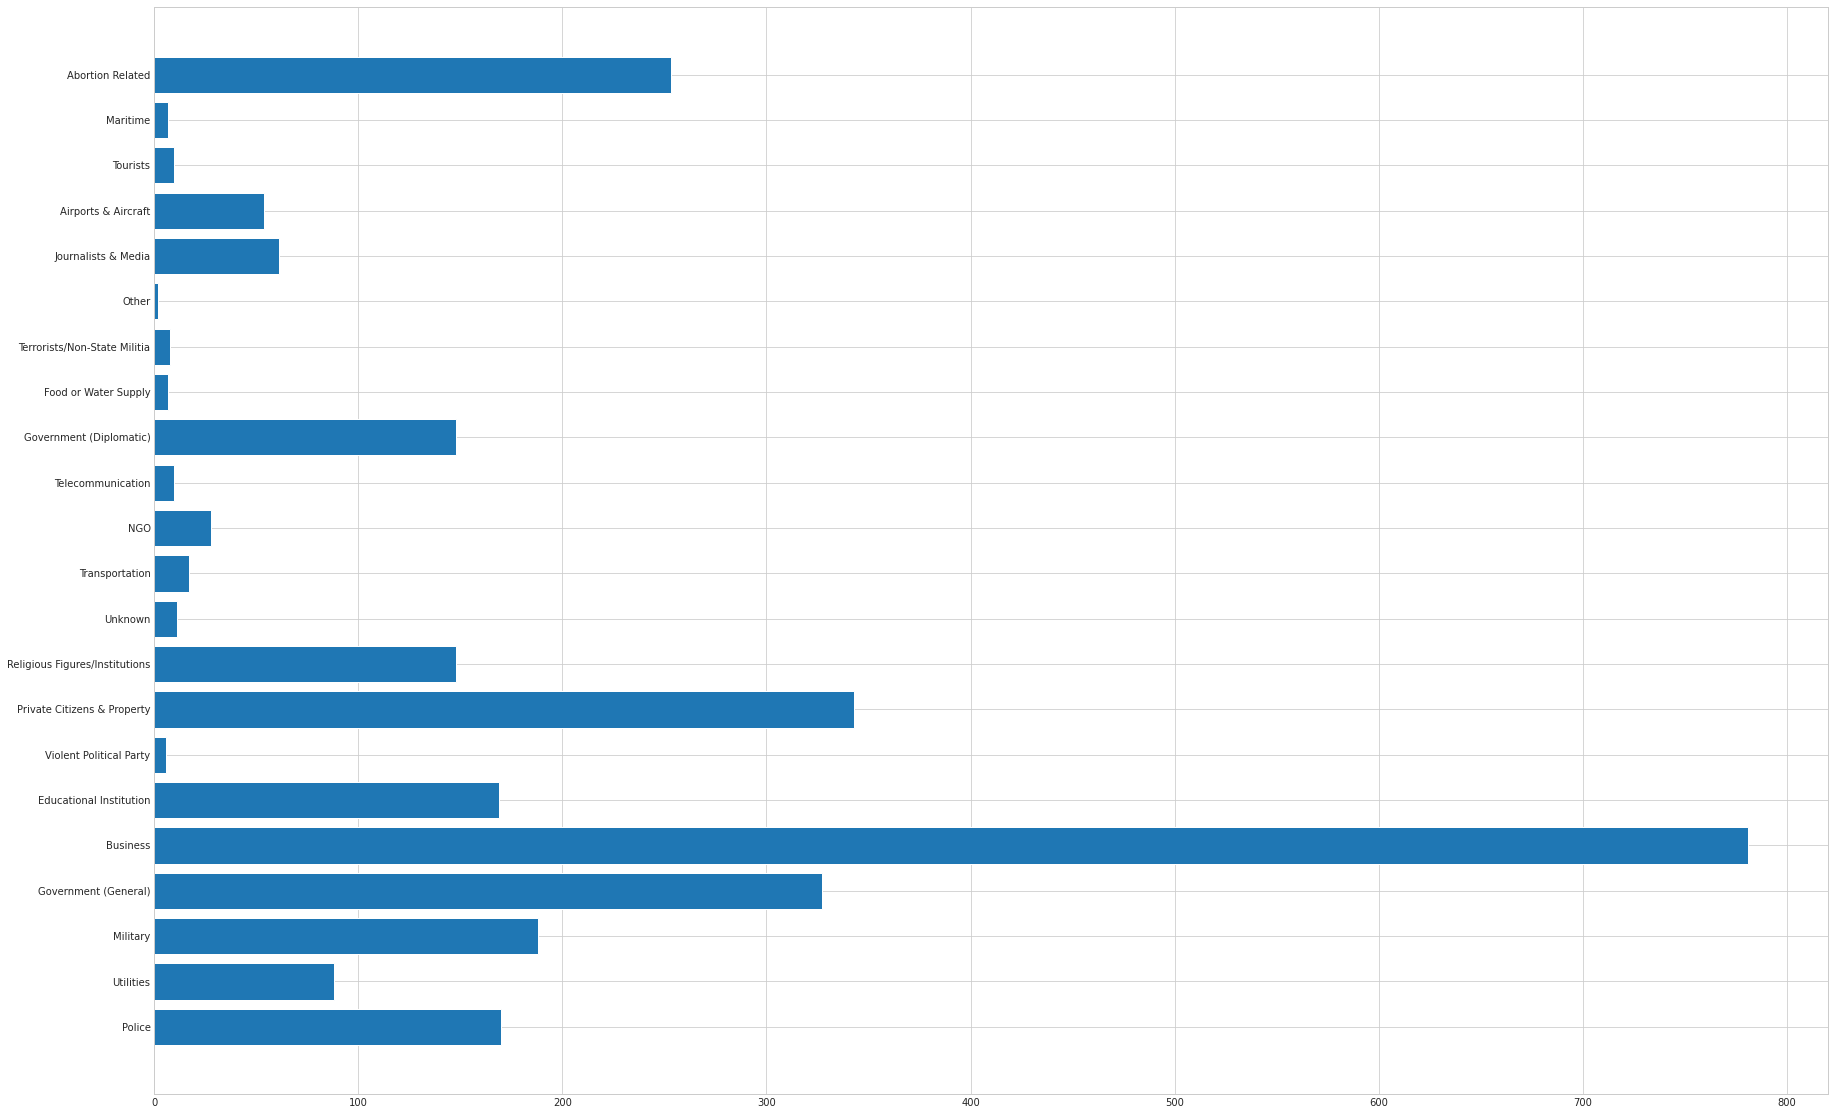

In [0]:
# 2. show bar chart:
target_names = list(d.keys())
target_data = list(d.values())

fig = plt.figure()
fig, ax = plt.subplots(figsize=(30,20))
ax.barh(target_names,target_data)

**=> The main target of terrorists is Business**

# B. Motive of Terrorists:
3 main categories:
* Category 1: POLITICAL, ECONOMIC, RELIGIOUS, OR SOCIAL GOAL
* Category 2: INTENTION TO COERCE, INTIMIDATE OR PUBLICIZE TO LARGER AUDIENCE(S)
* Category 3: OUTSIDE INTERNATIONAL HUMANITARIAN LAW

In [0]:
motiv = USA[['crit1','crit2','crit3']].sum().reset_index()
motiv_sizes = list(motiv['index'])
motiv_labels = list(motiv[0])
motiv


,index,0
0,crit1,2798
1,crit2,2779
2,crit3,2799


<BarContainer object of 3 artists>

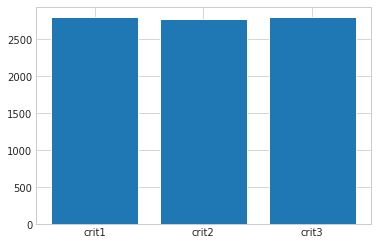

In [0]:
fig3, ax1 = plt.subplots()
ax1.bar(motiv_sizes,motiv_labels)

**=> Its difficult to show the different between 3 categories because almost all the incidents are included in all categories.**

# C. Motive 1 by States:
Data from 3 motive categories don't have much different
=> Visualize data for Motive 1 only. 

In [0]:
# 1. Clean some NaN in motive 1 data:
crit1 = USA[USA['crit1'] == 1]
crit1['provstate'].fillna(value='N/A', inplace=True)

In [0]:
# 2. Creat dictionary for motive 1 in each state:
b = list(crit1['provstate'])
c = {}
for e in b:
  if e in c:
    c.update({e : c.get(e)+1})
  else:
    c[e] = 1

crit1_city_names = list(c.keys())
crit1_city_data = list(c.values())


<Figure size 432x288 with 0 Axes>

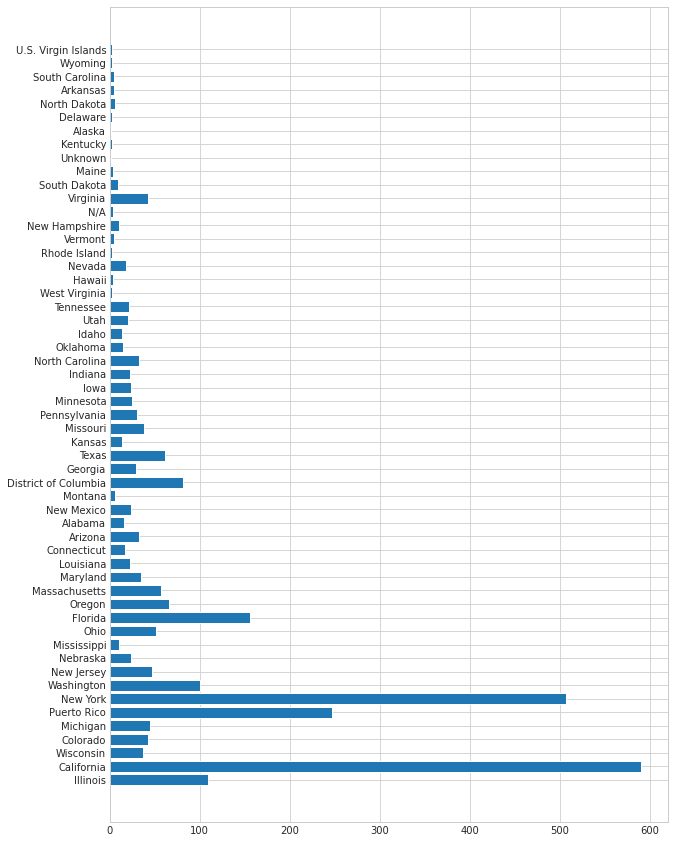

In [0]:
# 3. Bar Plot:
fig1 = plt.figure()
fig1, ax1 = plt.subplots(figsize=(10,15))
ax1.barh(crit1_city_names,crit1_city_data)
plt.show()

**=> California and New York is the main target for Terrorism. Because these two cities have the highest immigration rates.**

**=> This support "Trump travel ban"**

## 1. Main target of California:

In [0]:
#@title
cali = USA[USA['provstate'] == 'California']

j = list(cali['targtype1_txt'])
k = {}
for l in j:
  if l in k:
    k.update({l: k.get(l)+1})
  else:
    k[l] = 1

<Figure size 432x288 with 0 Axes>

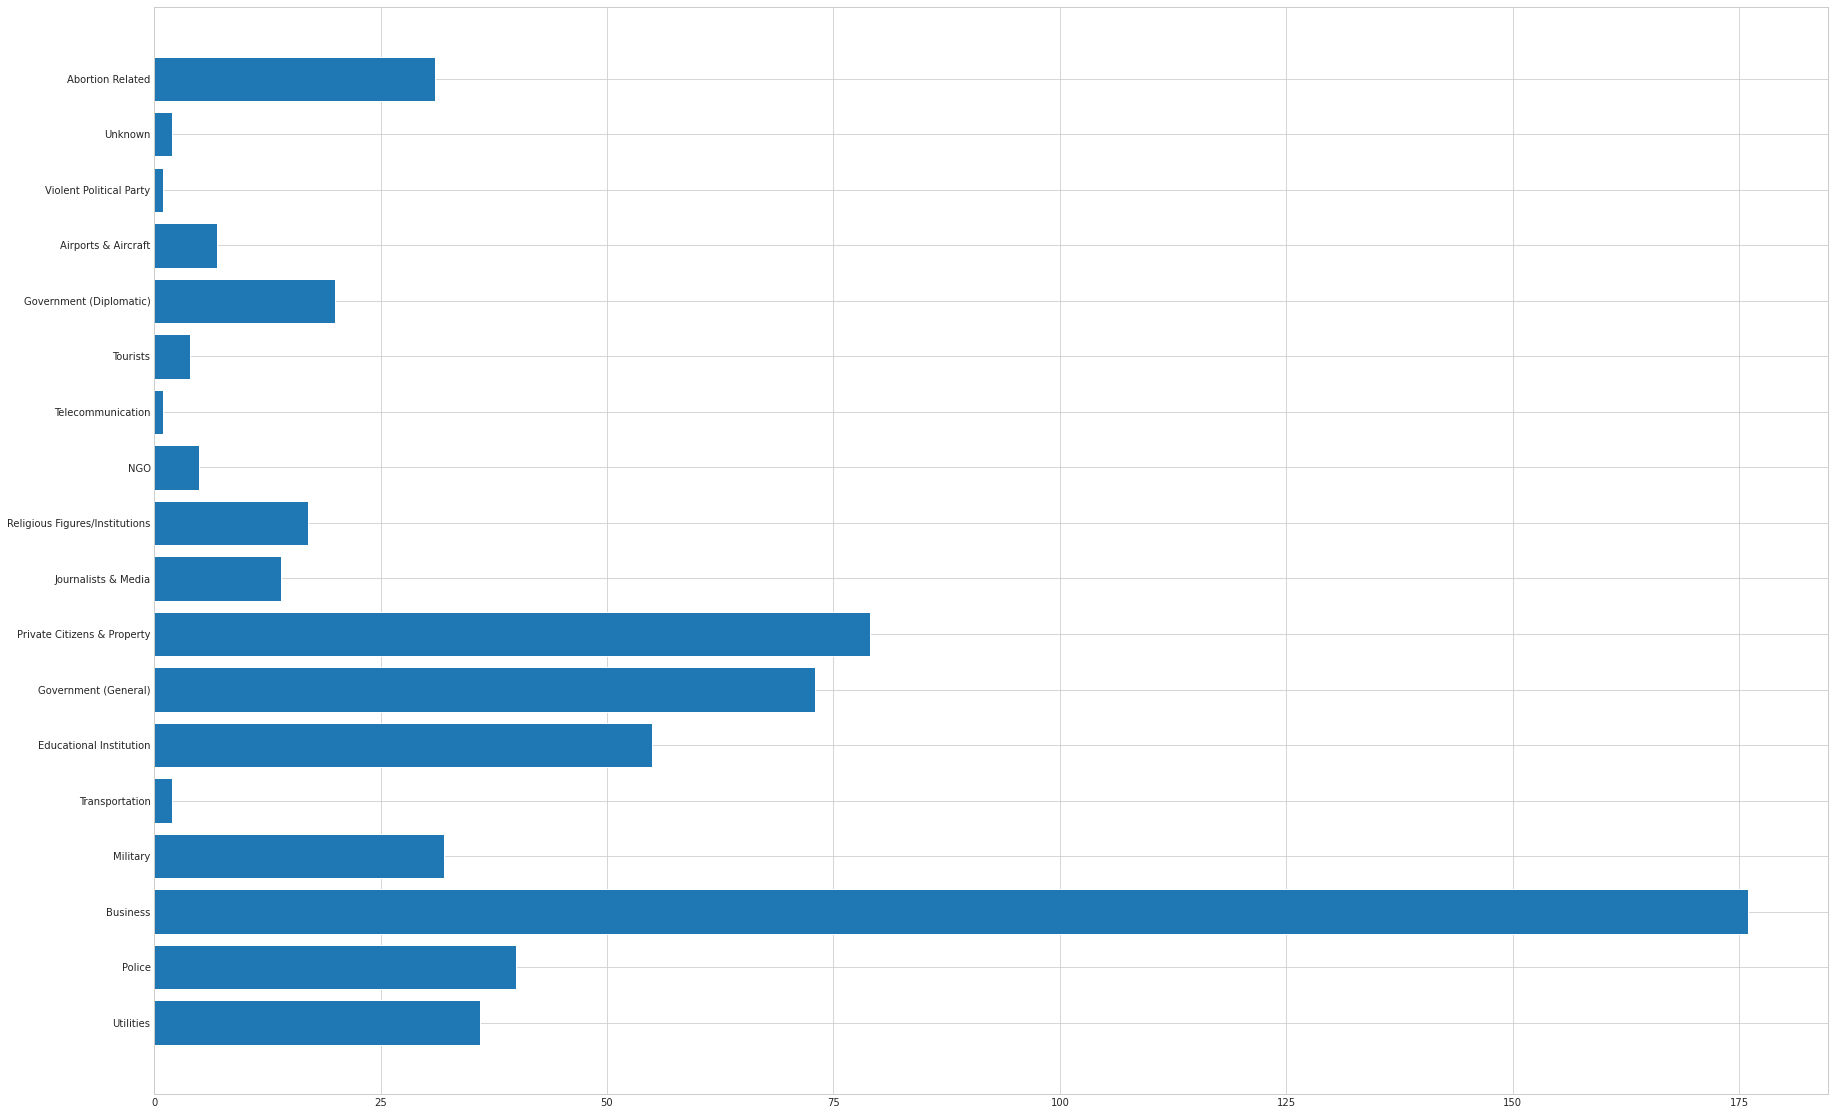

In [0]:
#@title
cali_names = list(k.keys())
cali_data = list(k.values())

fig_cali_nyc = plt.figure()
fig_cali_nyc, ax_cali = plt.subplots(figsize=(30,20))
ax_cali.barh(cali_names,cali_data)
plt.show()

## 2. Main target of New York:

In [0]:
#@title
nyc = USA[USA['provstate'] == 'New York']

m = list(nyc['targtype1_txt'])
n = {}
for o in m:
  if o in n:
    n.update({o: n.get(o)+1})
  else:
    n[o] = 1

<Figure size 432x288 with 0 Axes>

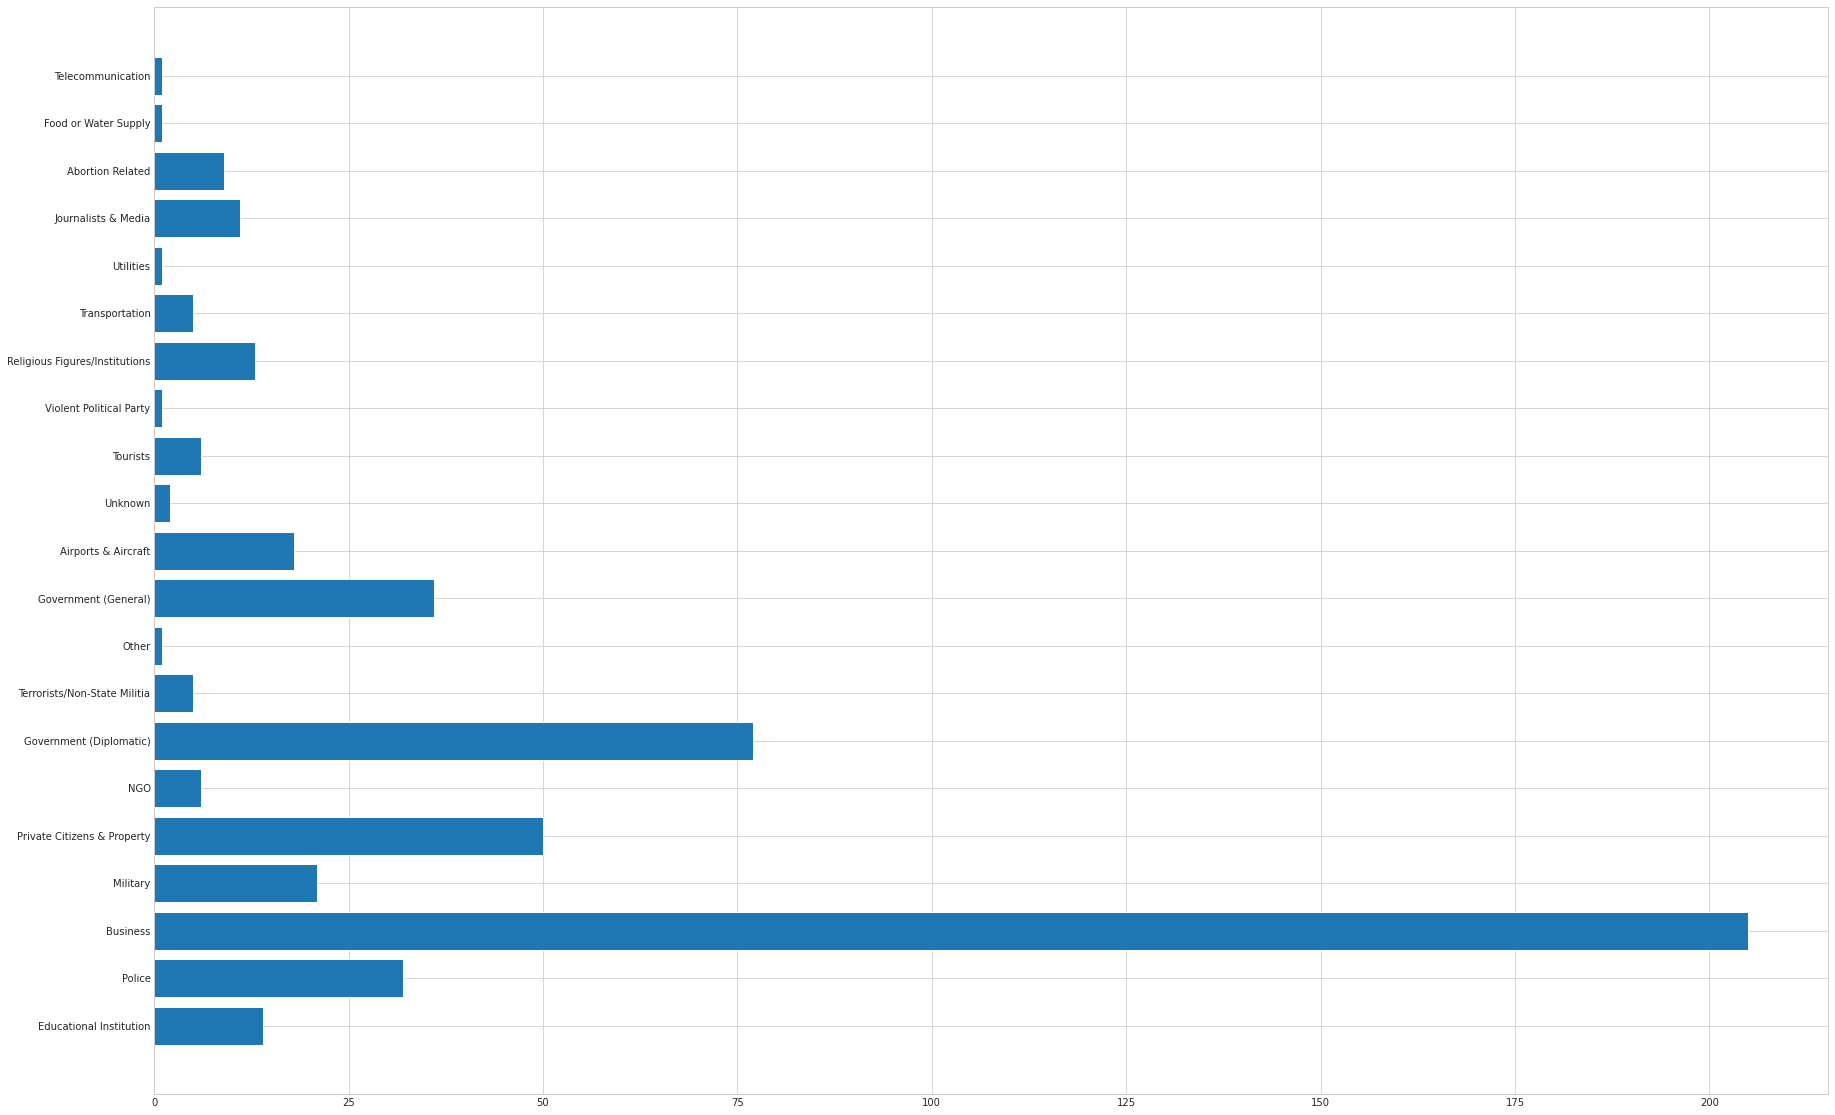

In [0]:
#@title
nyc_names = list(n.keys())
nyc_data = list(n.values())

fig_nyc = plt.figure()
fig_nyc, ax_nyc = plt.subplots(figsize=(30,20))
ax_nyc.barh(nyc_names,nyc_data)
plt.show()

**Business is still the main target in both California and New York.**

# D. Time Series of Each Target:

<Figure size 432x288 with 0 Axes>

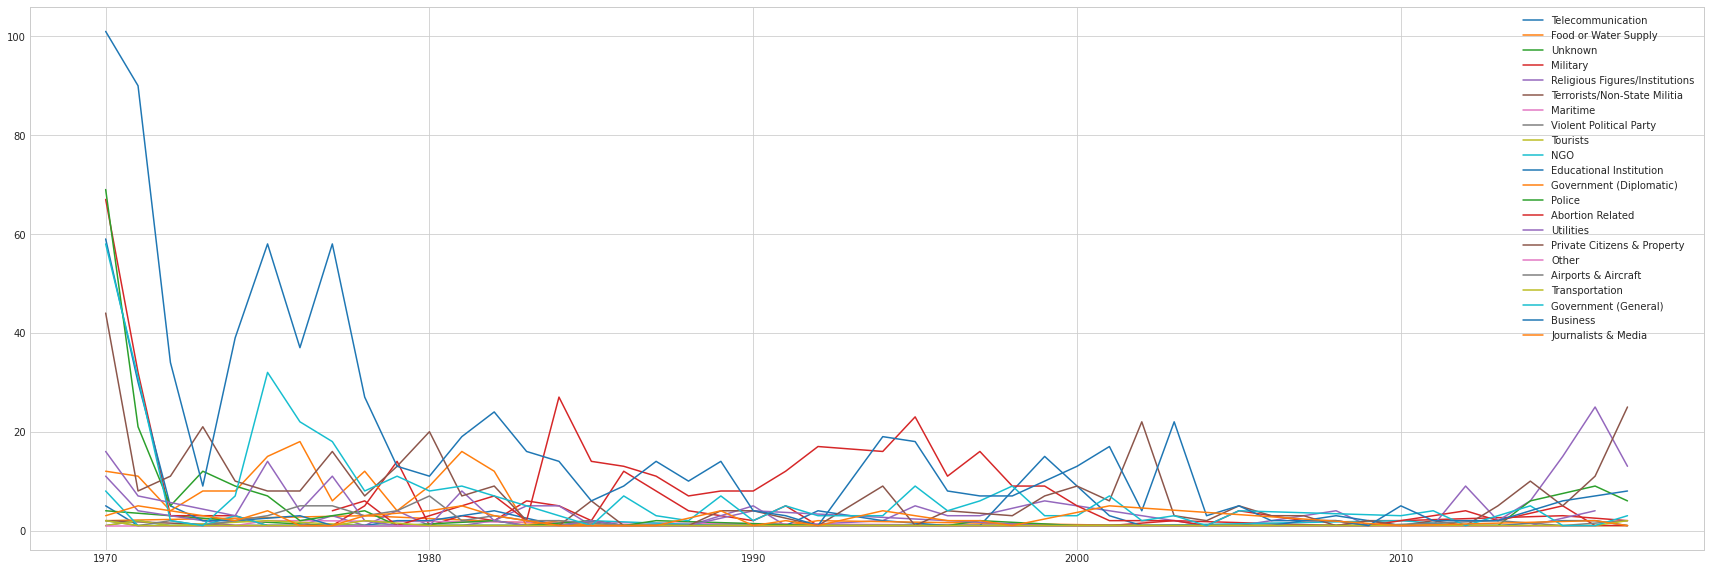

In [0]:
#@title
target = set(USA['targtype1_txt'])
fig2 = plt.figure()
fig2, time_se = plt.subplots(figsize=(30,10))
for tar in target:
  yr = list(USA[USA['targtype1_txt'] == tar].groupby('iyear')['eventid'].count().reset_index()['iyear'])
  num = list(USA[USA['targtype1_txt'] == tar].groupby('iyear')['eventid'].count().reset_index()['eventid'])
  time_se.plot(yr,num,label=tar)
plt.legend(loc='best')
plt.show()

## - Time series of Business Attack:

<Figure size 432x288 with 0 Axes>

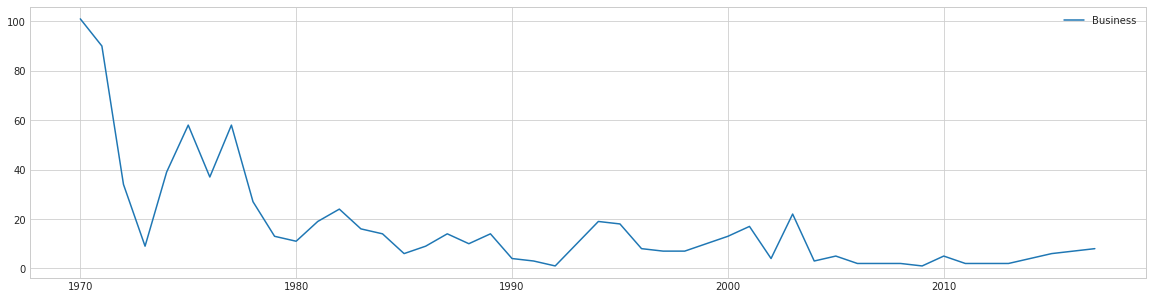

In [0]:
#@title
fig_bus = plt.figure()
fig_bus, time_se_bus = plt.subplots(figsize=(20,5))
yr_bus = list(USA[USA['targtype1_txt'] == 'Business'].groupby('iyear')['eventid'].count().reset_index()['iyear'])
num_bus = list(USA[USA['targtype1_txt'] == 'Business'].groupby('iyear')['eventid'].count().reset_index()['eventid'])
time_se_bus.plot(yr_bus,num_bus,label='Business')
plt.legend(loc='best')
plt.show()

**=> Business gain largest portion of terrorist attack at the early stage but not for the current stage.**

## - Time series of Religious Attack

<Figure size 432x288 with 0 Axes>

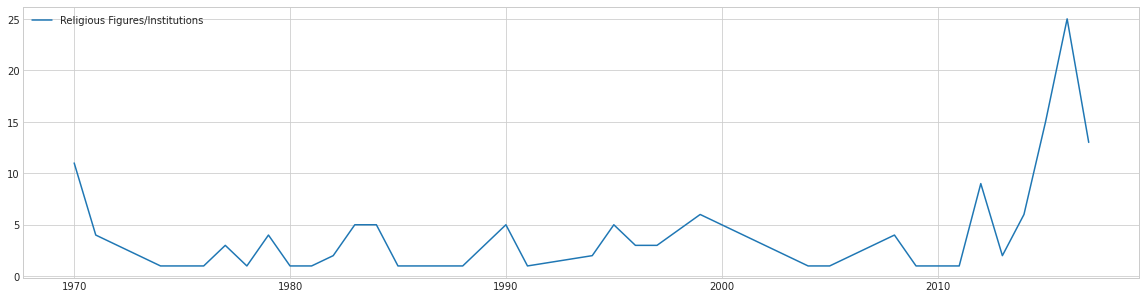

In [0]:
#@title
fig_re = plt.figure()
fig_re, time_se_re = plt.subplots(figsize=(20,5))
yr_re = list(USA[USA['targtype1_txt'] == 'Religious Figures/Institutions'].groupby('iyear')['eventid'].count().reset_index()['iyear'])
num_re = list(USA[USA['targtype1_txt'] == 'Religious Figures/Institutions'].groupby('iyear')['eventid'].count().reset_index()['eventid'])
time_se_re.plot(yr_re,num_re,label='Religious Figures/Institutions')
plt.legend(loc='best')
plt.show()

**=> Religious attack increase sharply from 2015 due to attack of different Religious institutions. This comes from the fact: USA has racially and ethnically diverse population.**
**=> This support "Trump travel ban"**